<font size=6><b>Lec08.NLP RNN
* <b>RNN(Recurrent Neural Network) : 순환 신경망
* <b>LSTM(Long Short-Term Memory) : 장단기 기억 신경망
* <b>BiLSTM(Bidirectional LSTM) : 양방향 LSTM 신경망
* <b>GRU(Gated Recurrent Unit) : 게이트 순환 유닛 신경망

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) ---------ㅊ--
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# RNN
* RNN(Recurrent Neural Network) : 순환 신경망
* 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델
* 가장 기본적인 인공 신경망 시퀀스 모델

<table>
    <tr><td><img src="https://wikidocs.net/images/page/22886/rnn_image4_ver2.PNG"></td>
        <td><img width=200 src="https://wikidocs.net/images/page/22888/vanilla_rnn_ver2.PNG"></td></tr></table><br>
입력층 : $h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$        <br>
출력층 : $y_{t} = f(W_{y}h_{t} + b)$ <br><br>
<img src="https://wikidocs.net/images/page/22886/rnn_images4-5.PNG">
<img src="https://wikidocs.net/images/page/22886/rnn_image6between7.PNG">

* 3D : (batch_size, timesteps, input_dim) 덩어리,행,렬
* model.add(SimpleRNN(hidden_units, input_shape=(timesteps=행수, input_dim=열수)))
* model.add(SimpleRNN(hidden_units, input_length=행수, input_dim=열수))
* return_sequences = True


# LSTM
* LSTM(Long Short-Term Memory) : 장단기 기억 신경망
* 입력 게이트,  삭제 게이트,  셀 상태,  출력 게이트
* ref : https://wikidocs.net/22888

<img width=300 src="https://wikidocs.net/images/page/22888/vaniila_rnn_and_different_lstm_ver2.PNG">
<table>
<tr>
<td>입력 게이트</td>    
<td><img width=200 src="https://wikidocs.net/images/page/22888/inputgate.PNG"></td>
<td>$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$<br>
    $g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$</td>    
</tr>
<tr>
<td>삭제 게이트</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/forgetgate.PNG"></td>
<td>$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$</td>
</tr>
<tr> 
<td>셀 상태</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/cellstate2.PNG"></td>
<td>$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$</td>
</tr>    
<tr>
<td>출력 게이트와 은닉 상태</td>        
<td><img width=200 src="https://wikidocs.net/images/page/22888/outputgateandhiddenstate.PNG"></td>
<td>$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$<br>
    $h_{t}=o_{t}∘tanh(c_{t})$</td>
</tr>
</table>

# BiLSTM
* BiLSTM(Bidirectional LSTM) : 양방향 LSTM 신경망
*  앞 시점의 은닉 상태(Forward States) 를 전달받아 현재의 은닉 상태를 계산
* 뒤 시점의 은닉 상태(Backward States) 를 전달 받아 현재의 은닉 상태를 계산
* 이 두 개의 값을 이용해 출력값 예측

<img src="https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG">

In [2]:
from tensorflow.keras.layers import Bidirectional, SimpleRNN
from keras.models import Sequential
# timesteps = 10
# input_dim = 5

# model = Sequential()
# model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

# GRU
* GRU(Gated Recurrent Unit) : 게이트 순환 유닛 신경망
* LSTM의 간소화
* ref : https://wikidocs.net/22889

<table><tr><td>
<img width=200 src="https://wikidocs.net/images/page/22889/gru.PNG">
</td><td>
$r_{t}=σ(W_{xr}x_{t}+W_{hr}h_{t-1}+b_{r})$ <br>
$z_{t}=σ(W_{xz}x_{t}+W_{hz}h_{t-1}+b_{z}) $  <br>
$g_{t}=tanh(W_{hg}(r_{t}∘h_{t-1})+W_{xg}x_{t}+b_{g})$  <br>
    $h_{t}=(1-z_{t})∘g_{t}+z_{t}∘h_{t-1}$</td></tr></table><br>
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

# [실습]
* RNN 이용 자연어처리

## Data Load

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
data = fetch_20newsgroups(subset='train'
                              , remove=('headers', 'footers', 'quotes')
                              , categories=['alt.atheism','comp.sys.mac.hardware','sci.electronics','talk.politics.guns','comp.windows.x']
                              , random_state=1)

In [5]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
data["target_names"][0]

'alt.atheism'

In [7]:
df = pd.DataFrame(data["data"],columns=["news"])
df["target"] = data["target"]
df.tail()

,news,target
2783,"\nI used a bunch as weights, when building a model airplane. Hung them\non the stringers, across the stringer, or whatever. Worked pretty well.",3
2784,"I repair a lot of monitors here, and I'd like to know where I can get a\npattern generator (or a circuit for one) that will provide MDA, EGA and VGA\nsignals. Using a whole PC to do this takes up too much space on my bench, and\nis somewhat less than portable. I guess I could sit down and design something,\nbut I don't have the time right now - any (reasonable) suggestions would be\nappreciated.\n\nTNX\n\nTG",3
2785,"Hi all,\n I've been following this thread about jacob's ladder for a few weeks and I\nhappened to come across one of the best project books that I've seen in a \nwhile. The book ""Gadgeteer's Goldmine"" by Gordon McComb offers over 55 \nexcellent low cost projects including: Jacob's Ladder, tesla coils, plasma \nspheres, a Van de Graaff generator, robots, an IR scope, and several laser \nprojects. The instructions come with complete part lists, warnings and \ndiagrams. For those of you who are interested in building any of the above \nlisted projects, you should seriously consider getting this book. The \npaperback version is only $19.95 too.\n\nFor those who want more information:\nTitle: Gadgeteer's Goldmine! 55 Space-Age Projects\nAuth: Gordon McComb\nPub: TAB Books\nCW: 1990\nISBN: 0-8306-8360-7\n\t0-8306-3360-X (paperback)\n Price: $19.95 (paperback)\n\n -Scott",3
2786,"\n\nPreliminary data regarding similar research into kangaroo overpopulation\nin Australia do not in any way support the cost-effectiveness of this\napproach. It _may_ be cost-effective for deer--if you quietly overlook\nthe fact that the net cost to the state of deer hunting is _negative_\n(i.e. a profit) because the (majority of) hunters pay for licences.\nThe cost comparisons are probably being done assuming that people have\nto be employed to cull the animals, which is not in fact the case.\nYou figure people are going to pay for licences to implant contraceptive\npellets or spread baits?\n\nThere has been a fair bit of discussion about this here recently,\nbecause the kangaroo population in the grounds of the Governor-\nGeneral's residence has now reached plague proportions. Despite the\nwhines of the rampant animal-libbers, the most effective method of\ncontrolling the population is still considered to be controlled\nshooting.\n\n\nSome people take satisfaction (IMHO, legitimate satisfaction) in eating\nfood that they have harvested themselves. The pleasure derived from\nhunting is the same as that you get from eating fruit and vegetables\ngrown in your own garden (and, in general, game meat is probably much \nfreer of unpleasant chemicals than what you buy from the butcher or\nthe supermarket).\n\n\nBy ""cannot now be justified"" I guess you mean that you personally\ndon't see any justification. Fine--but what makes your opinion\nso important?\n\n\nCertainly the last point is correct. If politicians don't see any\nvotes for themselves in opposing stupid legislation or in developing\nand supporting measures which might be effective in reducing the \nincidence of violent crime they won't do these things.",4
2787,"Are there any vendors supporting pressure sensitive tablet/pen with X? I\nwill appreciate any pointers.\n\nThanks, Sanjay\n",2


## 워드 임베딩
<pre>
 희소행렬              밀집행렬
-----------------    -----------------
원핫인코딩            차수로 차원 축소
0 1 의값             분산최대화 투영 행렬내적 : float값
벡터의크기=voca_size  dim(차수) 크기의 voca_size

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

vector = CountVectorizer()                       # 패딩할 필요없다!!!
encoded = vector.fit_transform(df['news']).toarray() # 밀집행렬 >> 희소행렬
vocab = vector.vocabulary_
# vocab.values()==1
vocab_sorted = sorted(vector.vocabulary_.items(), key = lambda x:x[1], reverse = True)

encoded.shape, len(vocab), df.shape, vocab_sorted[:5]
# print('vocabulary :',vector.vocabulary_) 
# print(len(bag))

((2788, 31838),
 31838,
 (2788, 2),
 [('ýé', 31837),
  ('³ation', 31836),
  ('zz_g9q3', 31835),
  ('zz', 31834),
  ('zyxel', 31833)])

### 임베딩길이
* map(function, iterable)  >> iterable을 function 적용해줘
* list(map(int,[1.1,2.2,3.3]))

In [9]:
list(map(len, [[1,2],[3,4,5]]))

[2, 3]

In [10]:
max_length = max(len(x) for x in encoded )
max_length

31838

In [11]:
len(df)

2788

In [12]:
sum(list(map(sum, encoded)))/( len(df) )


169.51470588235293

In [13]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df["news"])
text_seq_list = token.texts_to_sequences(df["news"])
word_cnt = token.word_counts
word_idx=token.word_index
doc_cnt = token.word_docs
max_length = max(len(x) for x in encoded )
max_length
# list(word_cnt)[:5], list(word_idx)[:5], list(doc_cnt)[:5]

31838

In [14]:
# dict 슬라이싱
import itertools 
res = dict(itertools.islice(word_idx.items(), 2))
print(res)
res = dict( list(word_idx.items())[:2] )
print(res)


{'the': 1, 'to': 2}
{'the': 1, 'to': 2}


## Word2vec
* 단어단어간의 유사도

## Glove
* 카운트기반 + 확률(유사도)

## Elmo
* 사전 훈련된 사전 데이터를 이용

## train test 분리

In [15]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2788 non-null   object
 1   target  2788 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.7+ KB


((2788, 2), None)

In [16]:
padding_res = pad_sequences(sequences=text_seq_list,   
                   maxlen=max_length,      
                   padding="pre" 
                  )
padding_res[:5]
padding_res.shape, type(padding_res)

((2788, 31838), numpy.ndarray)

In [17]:
padding_df = pd.DataFrame(padding_res)
padding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Columns: 31838 entries, 0 to 31837
dtypes: int32(31838)
memory usage: 338.6 MB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y=df["target"]
X=padding_res
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((2230, 31838), (558, 31838), (2230,), (558,))

# 모델학습

2    593
3    591
1    578
4    546
0    480
Name: target, dtype: int64


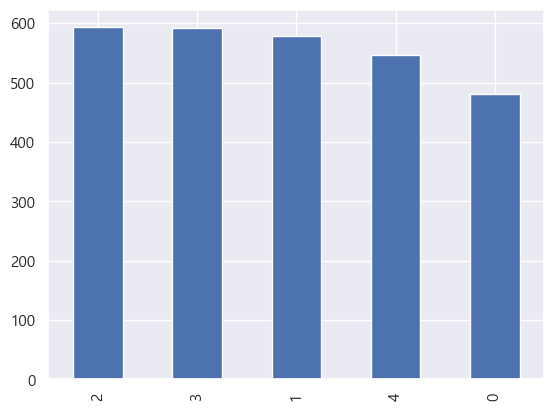

In [20]:
print(  df["target"].value_counts()   )

df["target"].value_counts().plot(kind = 'bar')
plt.show()

## 분류모델

### RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
cf = RandomForestClassifier()
cf.fit(X_train,y_train)
pred = cf.predict(X_test)
sc = accuracy_score(y_test, pred)
sc  ## tokenizer()

0.24551971326164876

### CNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

### Callback 설정
ref : https://keras.io/api/callbacks/<br>  
<font color=black>* callback 기능 : Usage of callbacks via the built-in fit() loop <br>
  <font color=black>* Write TensorBoard logs after every batch of training to monitor your metrics <br>
  <font color=red>* Periodically save your model to disk  ----------------- 모델저장 <br>
  <font color=red>* Do early stopping   ----------------------------------- 오버피팅 시 조기종료 <br>
  <font color=black>* Get a view on internal states and statistics of a model during training

In [24]:
# 모델 저장 폴더
import os
if not os.path.exists("./model"):
    os.mkdir('./model')

In [25]:
stopping = EarlyStopping(patience=3),          #------------PATIENCE__ : 조기종료
ckpoint  = ModelCheckpoint(filepath='./model/mymodel_{epoch:02d}_{val_loss:.4f}.h5',
                monitor='val_loss',          #------------어떤 점수를 기준으로 모니터링할까
                save_best_only=True,         #------------이전보다 좋아질때만 저장
                save_weights_only=False      #------------모델+가중치 같이 저장
               )  # 이전 epoch 점수보다 현재 점수가 좋으면 모델 저장 : mymodel_03_2417.h5

In [27]:

model = Sequential()
model.add(Embedding(len(vocab), 100))  ## 밀집행렬 차원축소
#----------------------------CNN 1D-------------------------------------------
model.add(Conv1D(260, 3, padding='valid', activation='relu'))
# model.add(Dropout(0.3))
model.add(GlobalMaxPooling1D())  
model.add(Dense(56, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
ckpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stopping, ckpoint])  ## callback 중간에 멈추기

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding_1/embedding_lookup' defined at (most recent call last):
    File "C:\AI\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\AI\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\AI\pythonProject\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\AI\pythonProject\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\AI\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\AI\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\AI\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "C:\AI\pythonProject\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASIA\AppData\Local\Temp\ipykernel_1628\4067364890.py", line 15, in <module>
      history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stopping, ckpoint])  ## callback 중간에 멈추기
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\AI\pythonProject\venv\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding_1/embedding_lookup'
indices[14,31722] = 32157 is not in [0, 31838)
	 [[{{node sequential_1/embedding_1/embedding_lookup}}]] [Op:__inference_train_function_2551]

In [ ]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

### CNN + RNN

### RNN(LSTM, BiLSTM GRU)